# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Seth D'Agostino
- Mikaila Keyes
- Jeffrey Chiu
- Jansen Jia

# Group Members IDs

- A13651408
- A14066254
- A12950096
- A13684931

# Research Question

We aim to explore how the socio-economic factors of a country (GDP, GDP per capita, HDI, etc.) as well as demographic factors (age, sex, generation) may contribute to the rates of suicide mortality.

## Background and Prior Work

According to the WHO, there are around 800,000 suicides across the world annually, which, if averaged, translates to one lost soul every 40 seconds (1). Astonishingly,  globally among people from 15 to 29 years old, suicide is the second leading cause of death (1). These simple, yet alarming statistics not only reveals a grim reality of the world we live in but also highlights the importance of this project. 

Death by suicide affects people across all spectrums of society. As a characteristic of modern society, no individual of a community is immune from suicide regardless of his or her culture, religion, economy, age, sex, or race. The pervasiveness of suicide could complicate the nature of suicide, but could be untangled by examining suicide against specific variables to identify correlations. Our datasets contain data for various countries across 1985-2016 about suicide rates amongst, age, and generation along with the GDP, GDP per capita, and HDI of the corresponding years. It might be helping in understanding any correlations between the economic development and/or growth of a nation and its national suicide rate. 

Group 021 from winter 2018 looked specifically at the suicide rates among veterans. The result of their study concluded that median threshold income, and not unemployment,  has a strong correlation with the veteran suicide rate. Instead of looking at suicide at a community level in America, we aim to examine suicide at a global scale.  

References:
- 1) Suicide data. (2018, November 05). Retrieved from https://www.who.int/mental_health/prevention/suicide/suicideprevent/en/
- 2)

# Hypothesis


We believe that economically underdeveloped nations will have higher rates of suicide mortality due to a lack of funding, access, and/or awarness of mental health support for the mentally ill.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import geopandas as geo

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import patsy
import statsmodels.api as sm

import random

# Data Wrangling

In [2]:
rates_85_16 = pd.read_csv("data/suicide-rates-overview-1985-to-2016.csv")
who_rate_by_country = pd.read_csv("data/WHO_suicide_mortality_by_country.csv")
who_country_metadata = pd.read_csv("data/WHO_country_metadata.csv")
rates_85_16.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
who_rate_by_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.1,NaN,NaN,NaN,NaN,4.8,4.7,NaN,NaN
2,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.7,NaN,NaN,NaN,NaN,5.0,4.7,NaN,NaN
3,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.8,NaN,NaN,NaN,NaN,6.0,6.3,NaN,NaN
4,Andorra,AND,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
who_country_metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra


# Data Cleaning

__rates_85_16:__  
- Got rid of country-year column of rates_85_16 because there is already a country and a year column
- Removed commas in gdp

In [5]:
rates_85_16 = rates_85_16.drop(columns=['country-year'])
rates_85_16.columns = ["country", "year", "sex", "age", "suicides_no", "population", "suicides_per_100k", "hdi", "gdp", "gdp_per_capita", "generation"]
rates_85_16["gdp"] = rates_85_16["gdp"].apply(lambda x : int(str(x).replace(",", "")))
rates_85_16.head(10)

,country,year,sex,age,suicides_no,population,suicides_per_100k,hdi,gdp,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,NaN,2156624900,796,Generation X


__who_rate_by_country:__ 
- Got rid of the indicator name and code columns that contained the same information for the whole column.
- Extracted only the 2000, 2005, 2010, 2015, and 2016 columns since all the others are blank

In [6]:
who_rate_by_country = who_rate_by_country[['Country Name','Country Code', '2000', '2005', '2010', '2015', '2016']]
who_rate_by_country.head(10)

,Country Name,Country Code,2000,2005,2010,2015,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,5.700000,6.300000,5.100000,4.800000,4.700000
2,Angola,AGO,7.900000,7.200000,5.700000,5.000000,4.700000
3,Albania,ALB,5.500000,6.700000,7.800000,6.000000,6.300000
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,4.328195,4.312462,4.206429,4.202179,4.266082
6,United Arab Emirates,ARE,3.200000,3.100000,3.000000,2.800000,2.800000
7,Argentina,ARG,9.500000,9.000000,8.700000,8.800000,9.200000
8,Armenia,ARM,3.300000,4.400000,6.000000,7.000000,6.600000
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN


__who_country_metadata:__
- Drop special notes columns
- Drop an empty Unnamed:5 column

In [7]:
who_country_metadata = who_country_metadata.drop(columns=['SpecialNotes'])
who_country_metadata = who_country_metadata.iloc[:,0:4]
who_country_metadata.head(10)

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
5,ARB,NaN,NaN,Arab World
6,ARE,Middle East & North Africa,High income,United Arab Emirates
7,ARG,Latin America & Caribbean,High income,Argentina
8,ARM,Europe & Central Asia,Upper middle income,Armenia
9,ASM,East Asia & Pacific,Upper middle income,American Samoa


- Merge who_rate_by_country and who_country_metadata by country Code
- Get rid of TableName column cuz it's just the same as Country Name
- Drop rows with Nan

In [8]:
who_rates_by_country = pd.merge(who_rate_by_country, who_country_metadata, on="Country Code")
who_rates_by_country = who_rates_by_country.drop(columns=['TableName'])
who_rates_by_country = who_rates_by_country.dropna()
who_rates_by_country.columns = ["country", "code", "2000", "2005", "2010", "2015", "2016", "region", "income_group"]
who_rates_by_country["suicides_per_100k"] = who_rates_by_country.mean(axis = 1)

who_rates_by_country.head(10)

,country,code,2000,2005,2010,2015,2016,region,income_group,suicides_per_100k
1,Afghanistan,AFG,5.7,6.3,5.1,4.8,4.7,South Asia,Low income,5.32
2,Angola,AGO,7.9,7.2,5.7,5.0,4.7,Sub-Saharan Africa,Lower middle income,6.10
3,Albania,ALB,5.5,6.7,7.8,6.0,6.3,Europe & Central Asia,Upper middle income,6.46
6,United Arab Emirates,ARE,3.2,3.1,3.0,2.8,2.8,Middle East & North Africa,High income,2.98
7,Argentina,ARG,9.5,9.0,8.7,8.8,9.2,Latin America & Caribbean,High income,9.04
8,Armenia,ARM,3.3,4.4,6.0,7.0,6.6,Europe & Central Asia,Upper middle income,5.46
10,Antigua and Barbuda,ATG,2.0,1.2,0.3,0.8,0.5,Latin America & Caribbean,High income,0.96
11,Australia,AUS,13.2,12.3,12.5,13.8,13.2,East Asia & Pacific,High income,13.00
12,Austria,AUT,20.0,17.3,16.0,16.0,15.6,Europe & Central Asia,High income,16.98
13,Azerbaijan,AZE,2.2,3.2,3.1,2.7,2.6,Europe & Central Asia,Upper middle income,2.76


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## Average Suicide Rate (per 100,000 people) Across the World

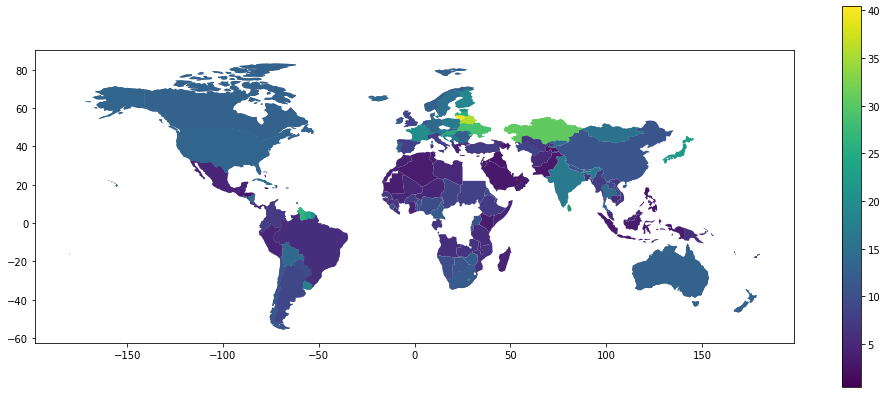

In [9]:
country_stats = rates_85_16.groupby("country").mean().reset_index()
country_stats = country_stats[["country", "suicides_per_100k"]]
who_stats = who_rates_by_country[["country", "suicides_per_100k"]]
merged_stats = pd.concat([country_stats, who_stats])
merged_stats = merged_stats.drop_duplicates()

merged_stats.rename(index=str, columns={"country": "name"}, inplace=True)
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
world_suicide_rates = pd.merge(world, merged_stats, on="name")

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
world_suicide_rates.plot(column='suicides_per_100k', ax=ax, legend=True)

## Global Average GDP per capita vs Global Average Suicides per 100k people (1985-2016)

Text(0.5, 0.98, 'Global Average GDP per capita vs Global Average Suicides per 100k people from 1985-2016')

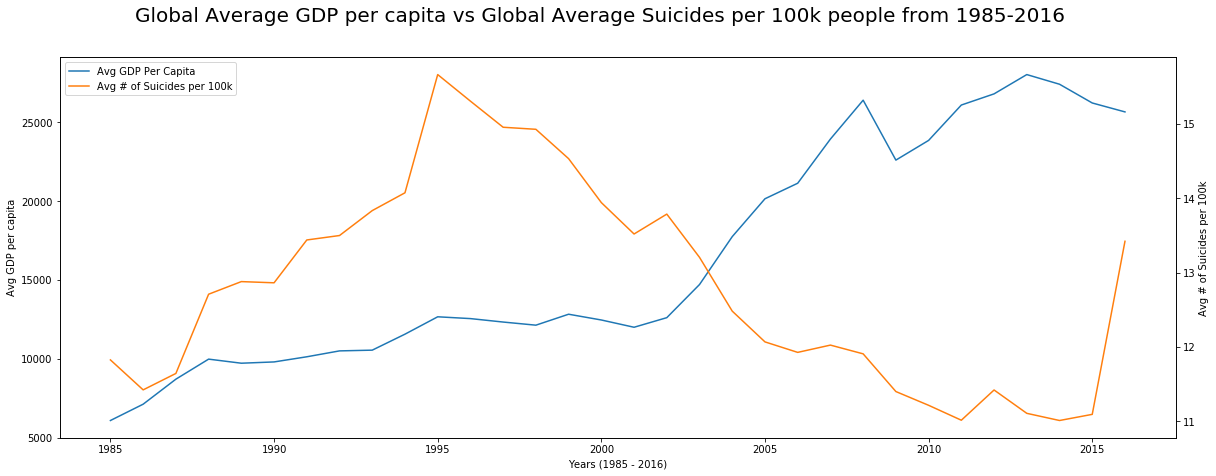

In [10]:
global_stats = rates_85_16.groupby(["year"]).mean().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 7))

color = 'tab:blue'
ax1.set_xlabel('Years (1985 - 2016)')
ax1.set_ylabel('Avg GDP per capita')
line1 = ax1.plot(global_stats["year"], global_stats["gdp_per_capita"], color=color, label="Avg GDP Per Capita")
ax1.legend(loc=0)

ax2 = ax1.twinx()

color = "tab:orange"
ax2.set_ylabel('Avg # of Suicides per 100k')
line2 = ax2.plot(global_stats["year"], global_stats["suicides_per_100k"], color=color, label="Avg # of Suicides per 100k")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0)
fig.suptitle("Global Average GDP per capita vs Global Average Suicides per 100k people from 1985-2016", fontsize=20)

Text(0.5, 0.98, 'Global Average GDP per capita vs Global Average Suicides per 100k people')

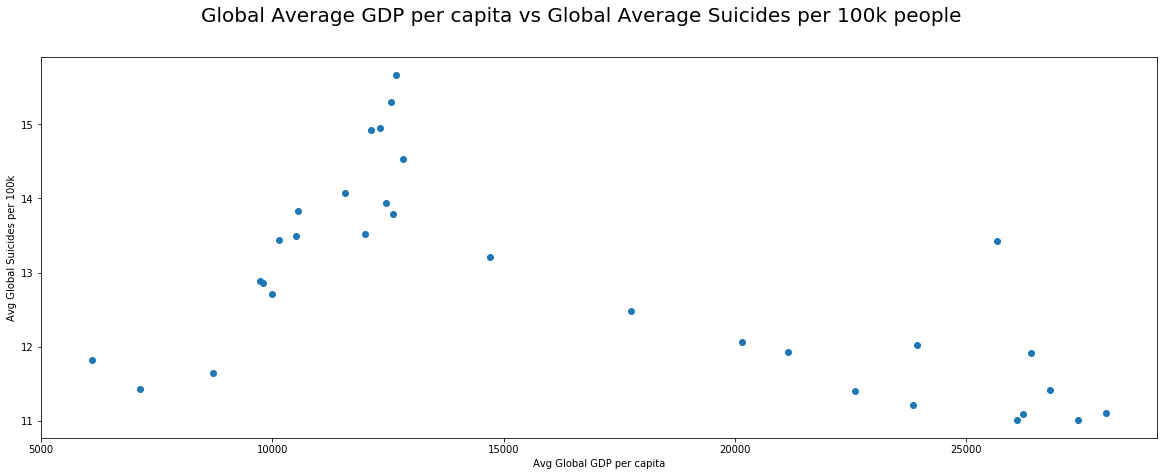

In [11]:
fig, ax1 = plt.subplots(figsize=(20, 7))
ax1.set_xlabel('Avg Global GDP per capita')
ax1.set_ylabel('Avg Global Suicides per 100k')
ax1.scatter(global_stats["gdp_per_capita"], global_stats["suicides_per_100k"])
fig.suptitle("Global Average GDP per capita vs Global Average Suicides per 100k people", fontsize=20)

## Global Average HDI vs Global Average Suicides per 100k people (1985-2016)

Text(0.5, 0.98, 'Global Average HDI vs Global Average Suicides per 100k people from 1985-2016')

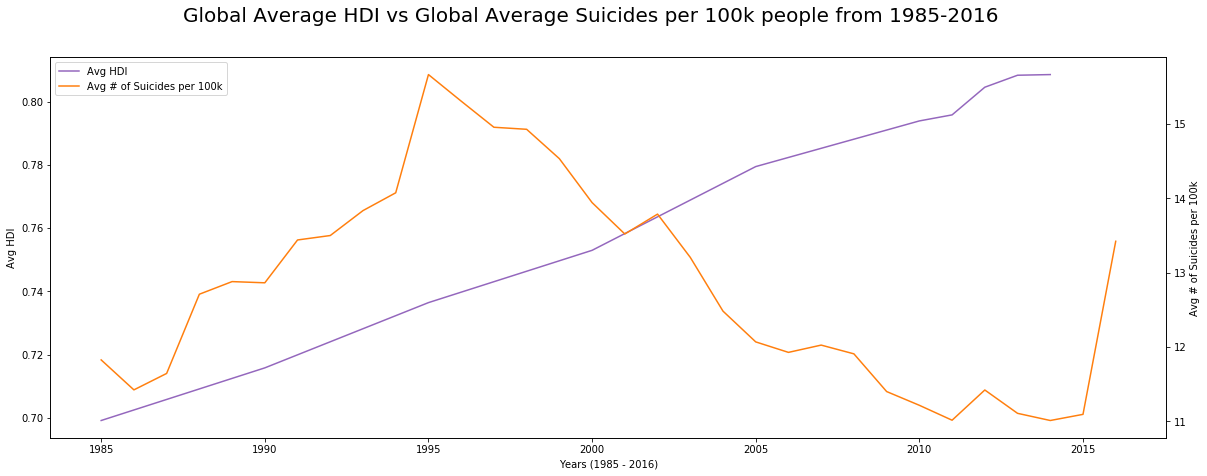

In [12]:
HDI_suicide_df = rates_85_16.drop(columns=["sex", "age", "population", "suicides_no", "gdp", "gdp_per_capita", "generation"])
HDI_suicide_df.dropna(axis=0, inplace=True)

df_suicide_hdi_annual= pd.DataFrame(columns=('year', 'hdi', 'suicide_rate'))
year_group = HDI_suicide_df.groupby('year')

for year,row in year_group:
    df_suicide_hdi_annual = df_suicide_hdi_annual.append({'year': year,
                                                            'hdi': np.mean(row.drop_duplicates(subset="country", keep='first', inplace=False)['hdi']),
                                                            'suicide_rate' : np.mean(row['suicides_per_100k'])}, ignore_index=True)
    
fig, ax1 = plt.subplots(figsize=(20, 7))

color = 'tab:purple'
ax1.set_xlabel('Years (1985 - 2016)')
ax1.set_ylabel('Avg HDI')
line1 = ax1.plot(df_suicide_hdi_annual["year"], df_suicide_hdi_annual["hdi"], color=color, label="Avg HDI")
ax1.legend(loc=0)

ax2 = ax1.twinx()

color = "tab:orange"
ax2.set_ylabel('Avg # of Suicides per 100k')
line2 = ax2.plot(global_stats["year"], global_stats["suicides_per_100k"], color=color, label="Avg # of Suicides per 100k")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0)
fig.suptitle("Global Average HDI vs Global Average Suicides per 100k people from 1985-2016", fontsize=20)

Text(0.5, 0.98, 'Global Average HDI per capita vs Global Average Suicides per 100k people')

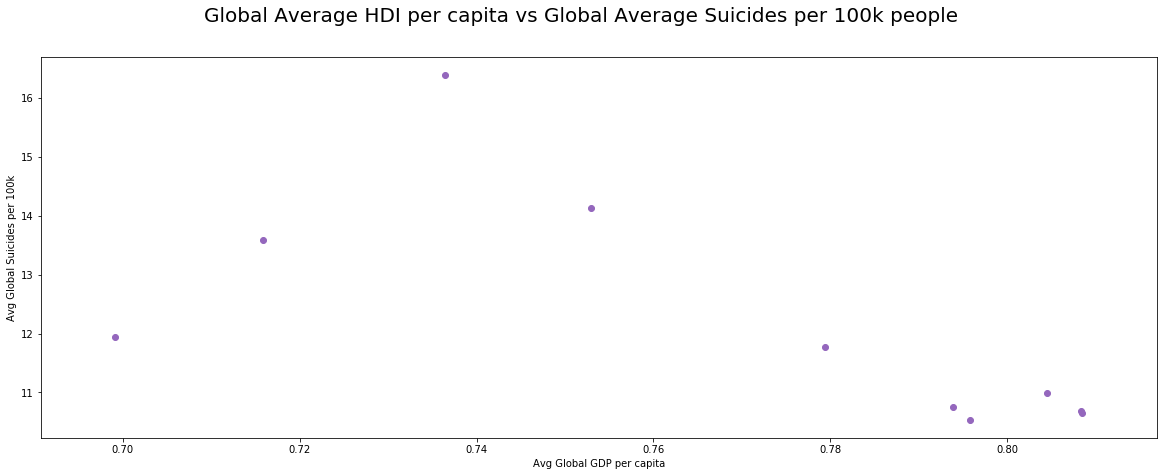

In [13]:
fig, ax1 = plt.subplots(figsize=(20, 7))
ax1.set_xlabel('Avg Global GDP per capita')
ax1.set_ylabel('Avg Global Suicides per 100k')
ax1.scatter(df_suicide_hdi_annual["hdi"], df_suicide_hdi_annual["suicide_rate"], color="tab:purple")
fig.suptitle("Global Average HDI per capita vs Global Average Suicides per 100k people", fontsize=20)

## Country Avg GDP vs Country Avg Suicide Rate 

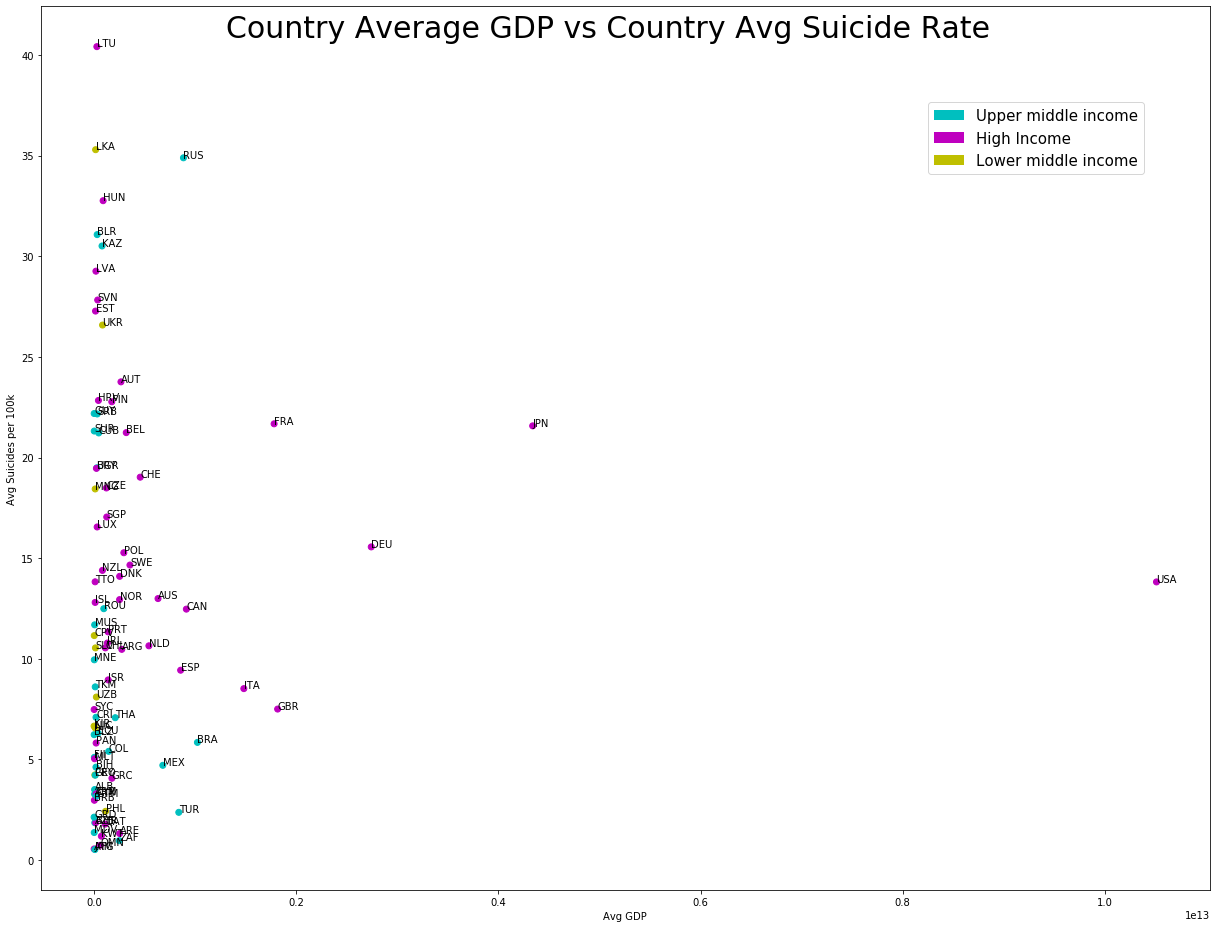

In [14]:
def income_group_to_number(income_group):
    i_dict = {'Upper middle income' : 'c', 
              'High income' : 'm', 
              'Lower middle income' : 'y' }
    return i_dict[income_group]

country_data = rates_85_16.groupby("country").mean().reset_index()
who_data = who_rates_by_country[['country', 'code', 'region', 'income_group']]
country_data = pd.merge(who_data, country_data, on="country")
country_data["income_group_num"] = country_data["income_group"].apply(income_group_to_number)

fig, ax1 = plt.subplots(figsize=(17, 13))

# Name of countries
ax1.set_xlabel('Avg GDP')
ax1.set_ylabel('Avg Suicides per 100k')
ax1.scatter(country_data["gdp"], country_data["suicides_per_100k"], c=country_data["income_group_num"])

for i, name in enumerate(country_data["code"].tolist()):
    ax1.annotate(name, (country_data.loc[i, "gdp"], country_data.loc[i, "suicides_per_100k"]))

recs = []
colors = ['c', 'm', 'y']
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,["Upper middle income", "High Income", "Lower middle income"],loc=1,prop={'size':15}, bbox_to_anchor=(.95, .90))    

fig.suptitle("Country Average GDP vs Country Avg Suicide Rate", fontsize=30)
fig.tight_layout()
plt.subplots_adjust(wspace = 1.0)
plt.show()

## Country Avg GDP per Capita vs Country Avg Suicide Rate

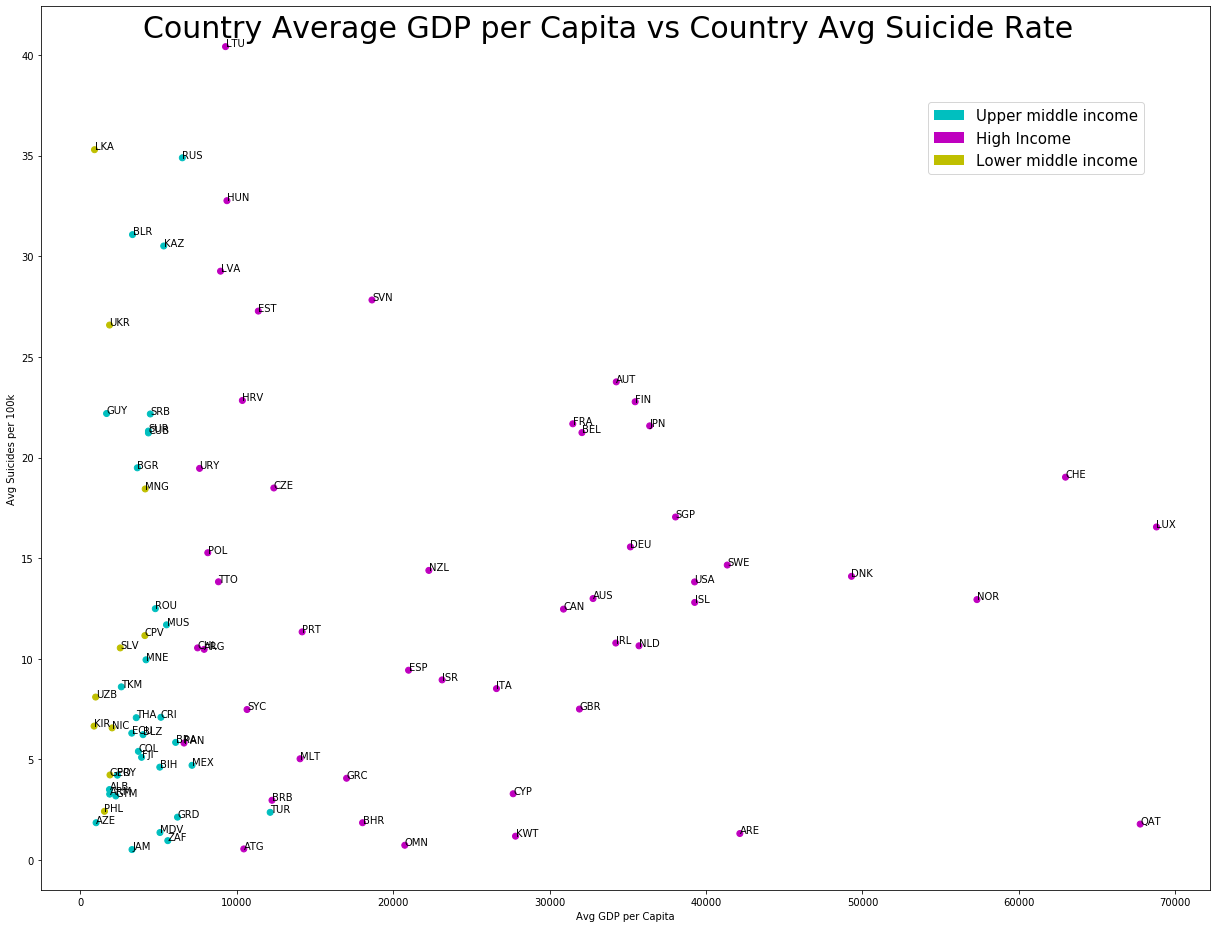

In [15]:
fig, ax1 = plt.subplots(figsize=(17, 13))

# Name of countries
ax1.set_xlabel('Avg GDP per Capita')
ax1.set_ylabel('Avg Suicides per 100k')
ax1.scatter(country_data["gdp_per_capita"], country_data["suicides_per_100k"], c=country_data["income_group_num"])

for i, name in enumerate(country_data["code"].tolist()):
    ax1.annotate(name, (country_data.loc[i, "gdp_per_capita"], country_data.loc[i, "suicides_per_100k"]))
    
recs = []
colors = ['c', 'm', 'y']
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,["Upper middle income", "High Income", "Lower middle income"],loc=1,prop={'size':15}, bbox_to_anchor=(.95, .90))    

fig.suptitle("Country Average GDP per Capita vs Country Avg Suicide Rate", fontsize=30)
fig.tight_layout()
plt.subplots_adjust(wspace = 1.0)
plt.show()

## Country Avg HDI vs Country Avg Suicide Rate 

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


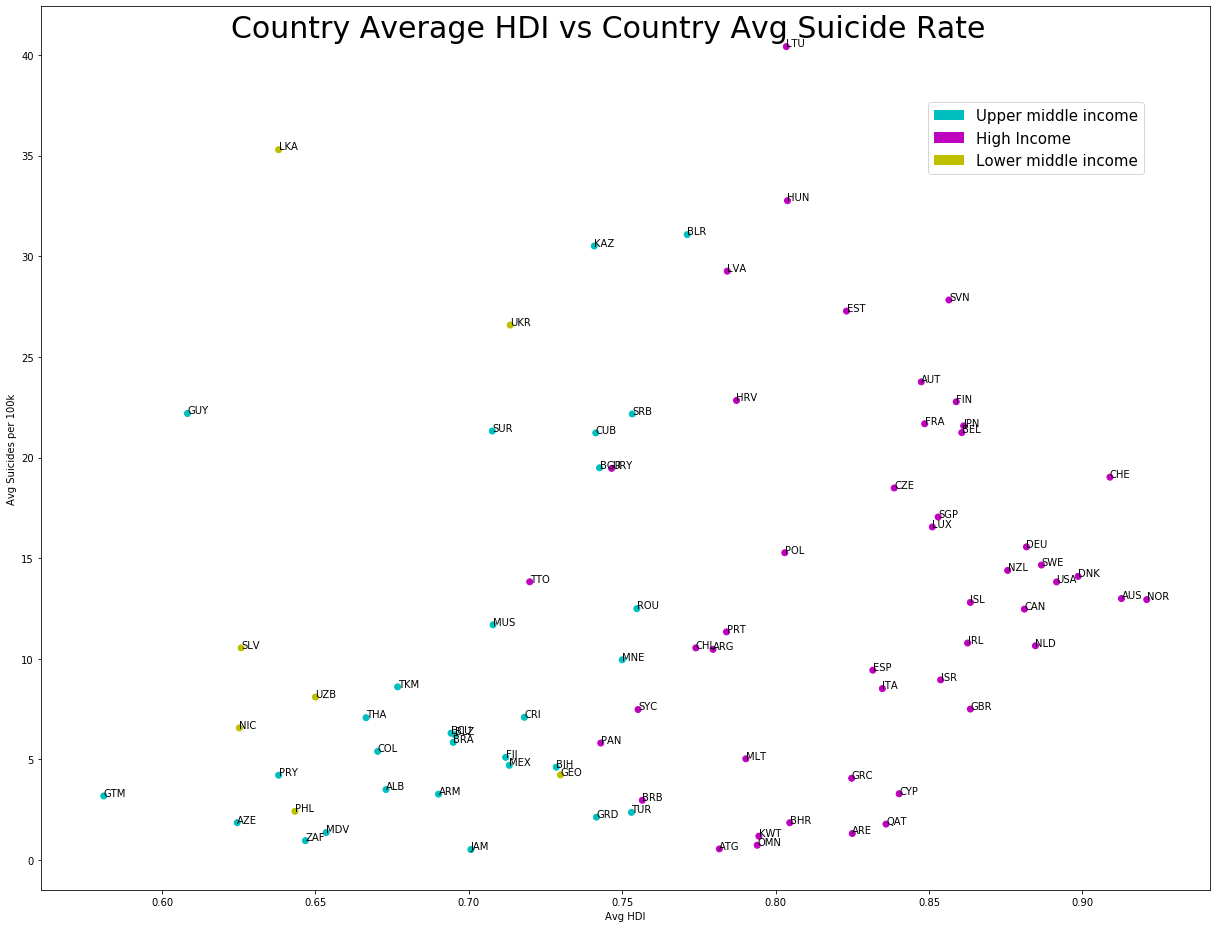

In [16]:
fig, ax1 = plt.subplots(figsize=(17, 13))

# Name of countries
ax1.set_xlabel('Avg HDI')
ax1.set_ylabel('Avg Suicides per 100k')
ax1.scatter(country_data["hdi"], country_data["suicides_per_100k"], c=country_data["income_group_num"])

for i, name in enumerate(country_data["code"].tolist()):
    ax1.annotate(name, (country_data.loc[i, "hdi"], country_data.loc[i, "suicides_per_100k"]))
    
recs = []
colors = ['c', 'm', 'y']
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,["Upper middle income", "High Income", "Lower middle income"],loc=1,prop={'size':15}, bbox_to_anchor=(.95, .90))    

fig.suptitle("Country Average HDI vs Country Avg Suicide Rate", fontsize=30)
fig.tight_layout()
plt.subplots_adjust(wspace = 1.0)
plt.show()

## Analysis within 10 random countries

In [17]:
country_set = set()
while len(country_set) < 10:
    country_set.add(random.choice(rates_85_16["country"].unique()))

countries = sorted(country_set)
for index, country in enumerate(countries):
    print(str(index + 1) + ". " + country)

1. Argentina
2. Belarus
3. Brazil
4. Costa Rica
5. Mauritius
6. Mongolia
7. New Zealand
8. Puerto Rico
9. Turkey
10. United Arab Emirates


## GDP per capita vs Suicide per 100k and HDI vs Suicide per 100k for each Country

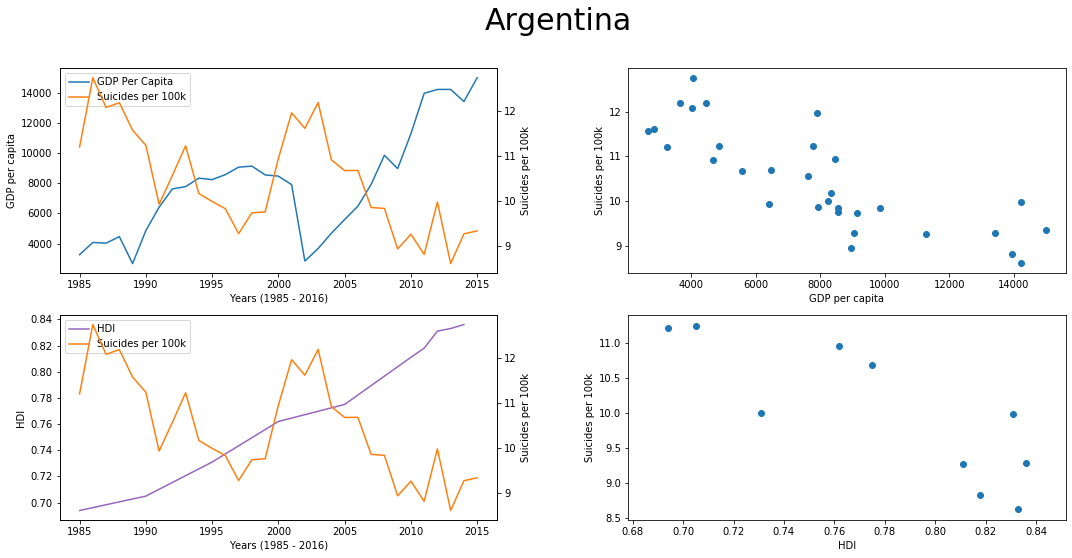

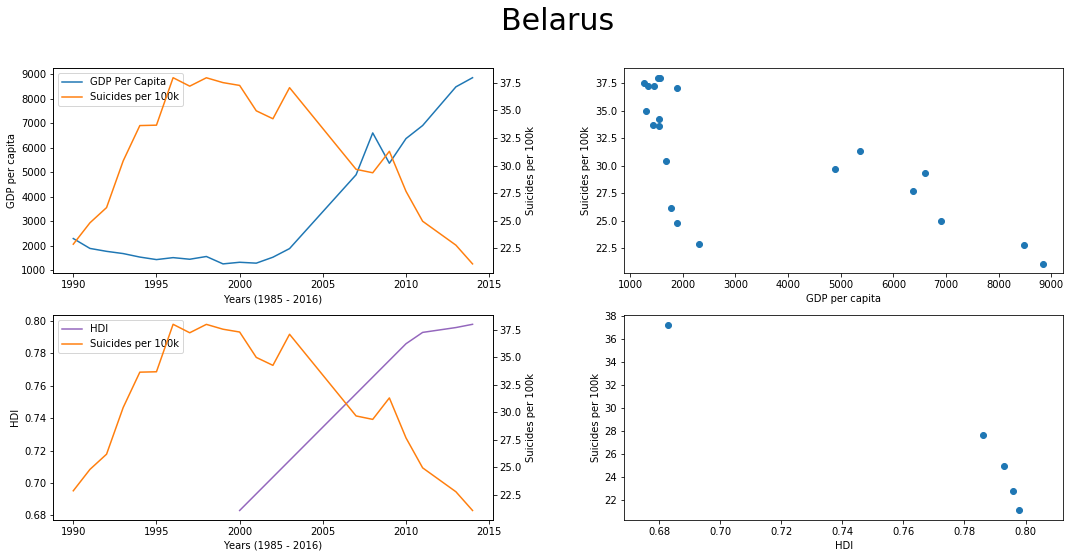

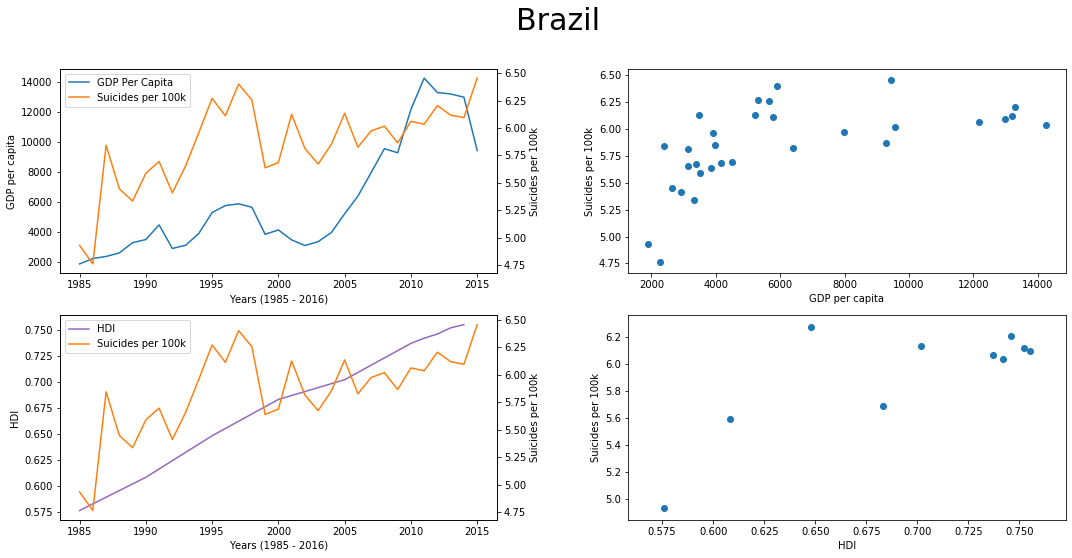

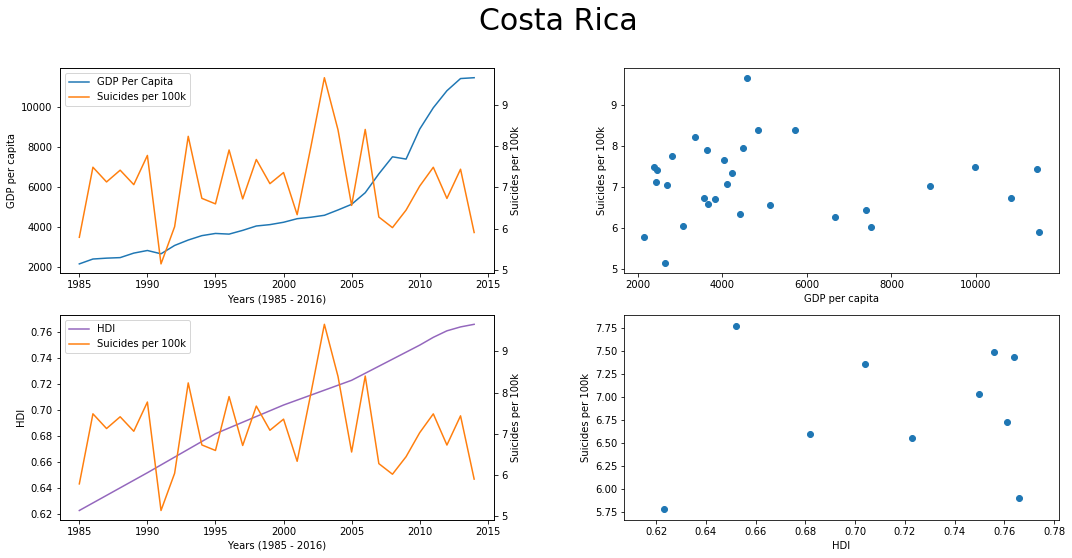

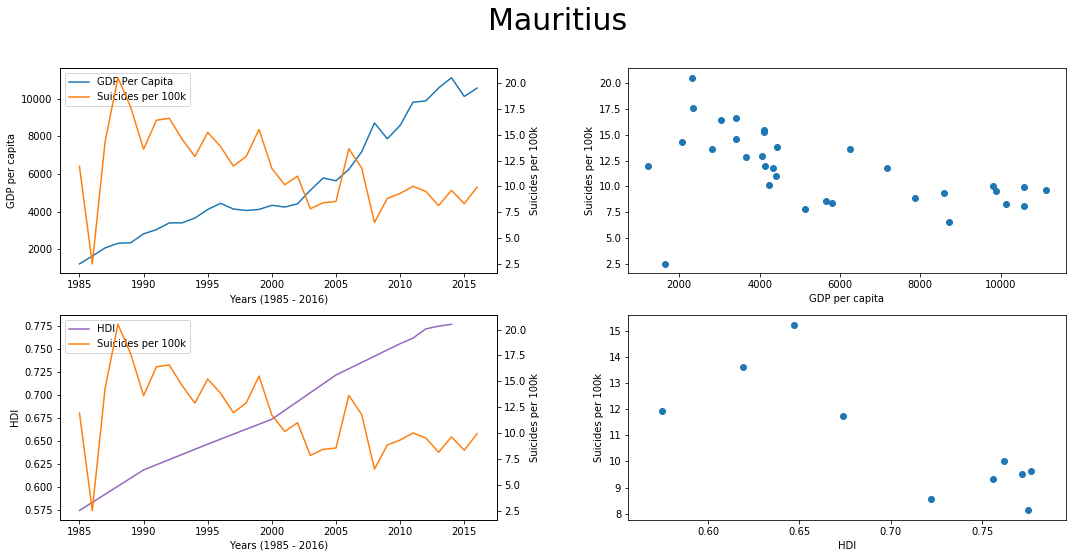

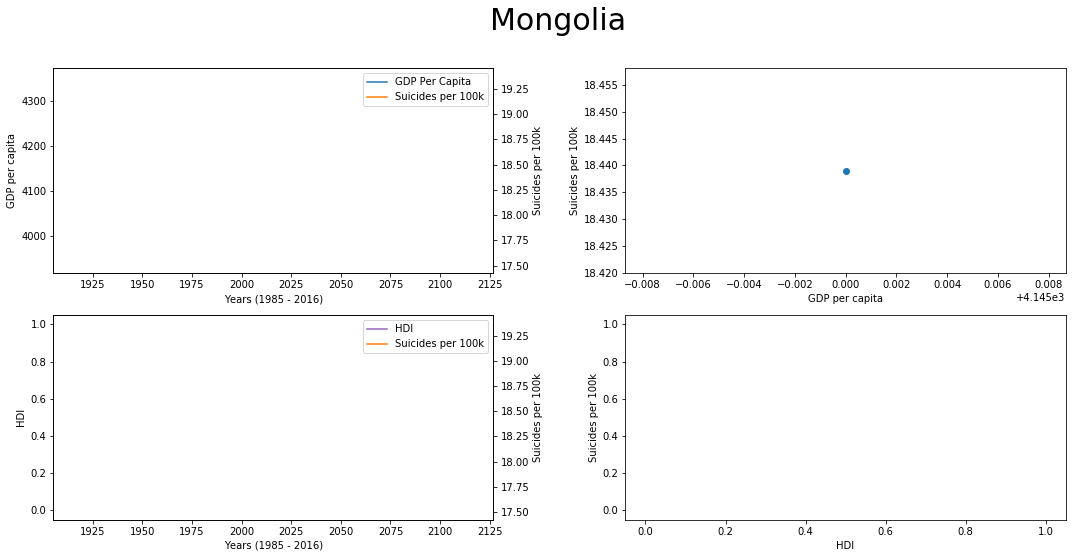

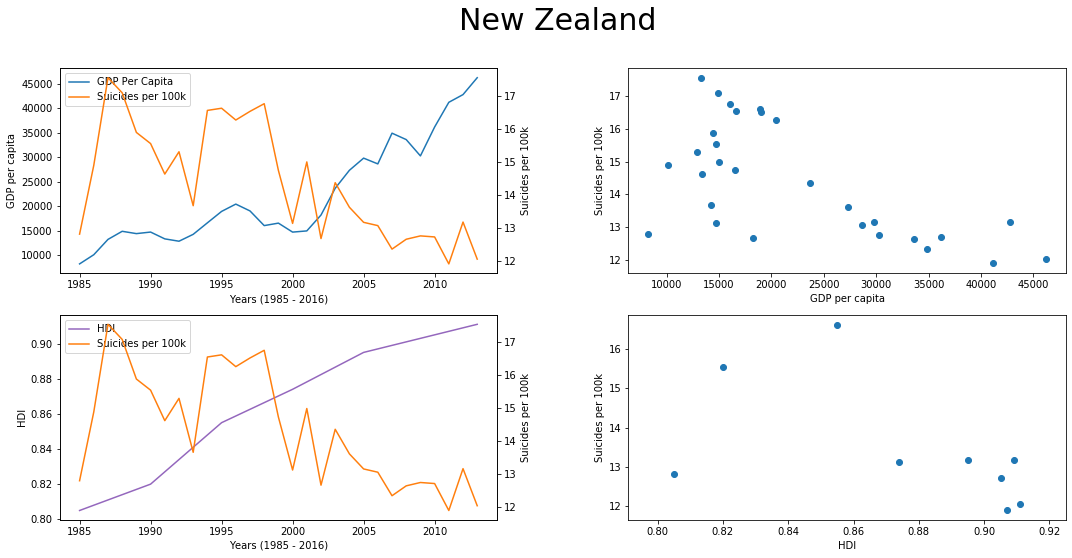

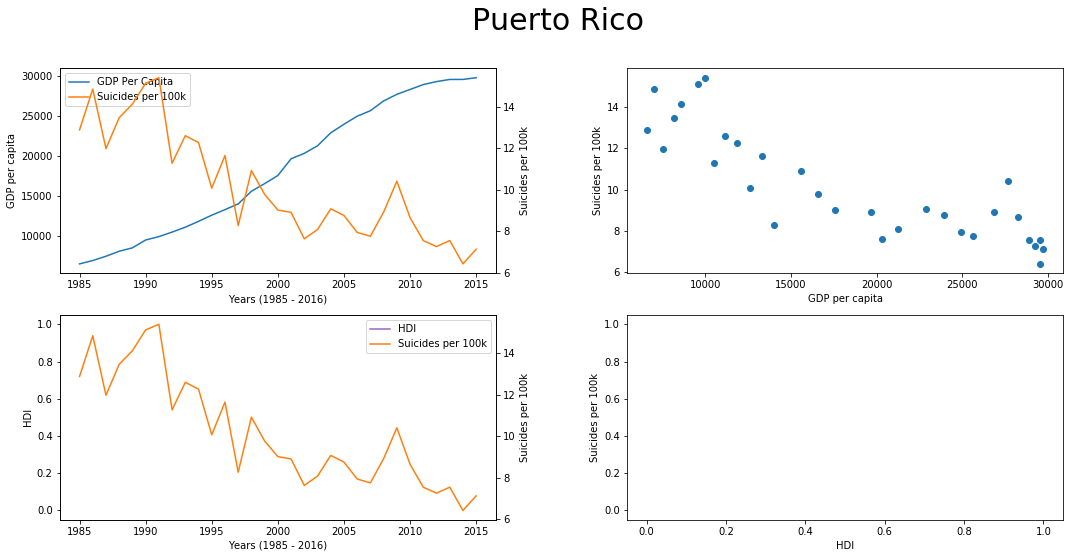

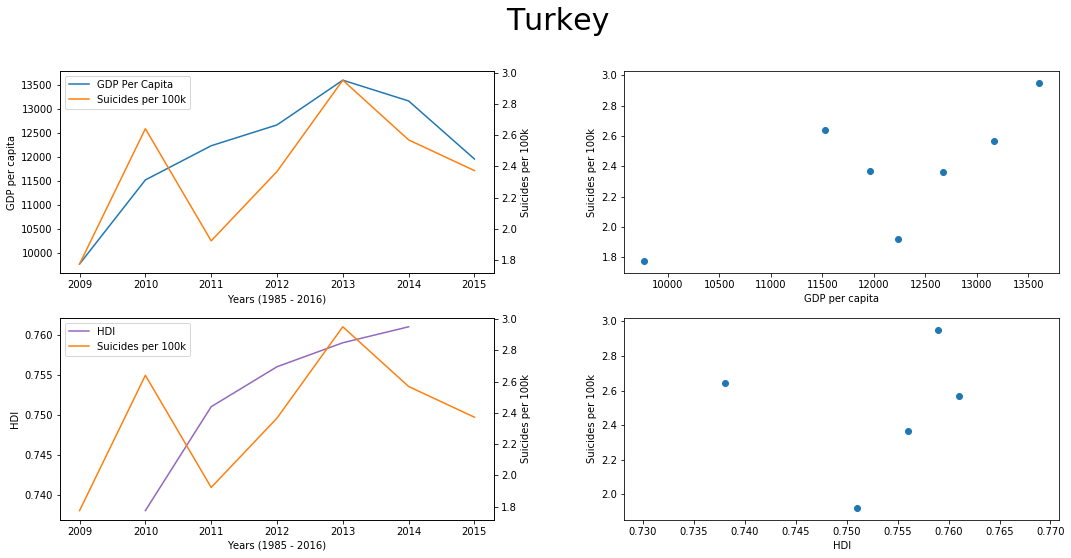

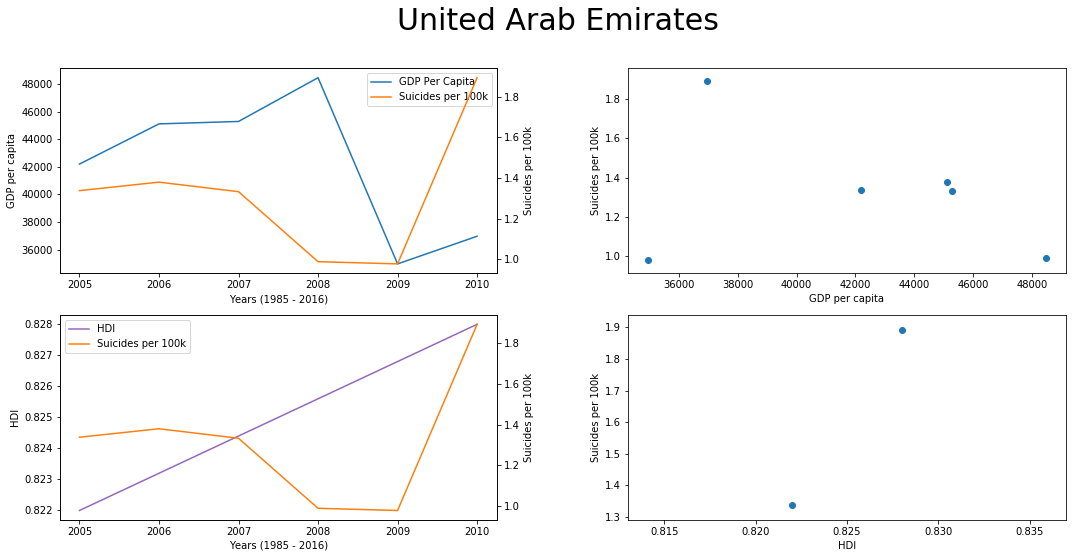

In [18]:
def plot_suicide_vs_gdp_and_hdi_per_year(country):
    fig, axes = plt.subplots(2, 2, figsize=(15, 7))
    
    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[1, 0]
    ax4 = axes[1, 1]
    
    # Top row for gdp
    data = rates_85_16[rates_85_16["country"] == country]
    suicide_gdp_per_year = data.groupby(["year"]).mean().reset_index()
    
    color = 'tab:blue'
    ax1.set_xlabel('Years (1985 - 2016)')
    ax1.set_ylabel('GDP per capita')
    line1 = ax1.plot(suicide_gdp_per_year["year"], suicide_gdp_per_year["gdp_per_capita"], color=color, label="GDP Per Capita")
    ax1.legend(loc=0)

    ax5 = ax1.twinx()
    
    color = "tab:orange"
    ax5.set_ylabel('Suicides per 100k')
    line2 = ax5.plot(suicide_gdp_per_year["year"], suicide_gdp_per_year["suicides_per_100k"], color=color, label="Suicides per 100k")

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc=0)

    ax2.set_xlabel('GDP per capita')
    ax2.set_ylabel('Suicides per 100k')
    ax2.scatter(suicide_gdp_per_year["gdp_per_capita"], suicide_gdp_per_year["suicides_per_100k"])
    
    # Bottom row for hdi
    HDI_suicide_df = data.drop(columns=["sex", "age", "population", "suicides_no", "gdp", "gdp_per_capita", "generation"])
    HDI_suicide_df.dropna(axis=0, inplace=True)

    df_suicide_hdi_annual= pd.DataFrame(columns=('year', 'hdi', 'suicide_rate'))
    year_group = HDI_suicide_df.groupby('year')

    for year,row in year_group:
        df_suicide_hdi_annual = df_suicide_hdi_annual.append({'year': year,
                                                                'hdi': np.mean(row.drop_duplicates(subset="country", keep='first', inplace=False)['hdi']),
                                                                'suicide_rate' : np.mean(row['suicides_per_100k'])}, ignore_index=True)
    
    color = 'tab:purple'
    ax3.set_xlabel('Years (1985 - 2016)')
    ax3.set_ylabel('HDI')
    line3 = ax3.plot(df_suicide_hdi_annual["year"], df_suicide_hdi_annual["hdi"], color=color, label="HDI")
    ax3.legend(loc=0)

    ax6 = ax3.twinx()
    
    color = "tab:orange"
    ax6.set_ylabel('Suicides per 100k')
    line4 = ax6.plot(suicide_gdp_per_year["year"], suicide_gdp_per_year["suicides_per_100k"], color=color, label="Suicides per 100k")

    bot_lines = line3 + line4
    labels = [l.get_label() for l in bot_lines]
    ax3.legend(bot_lines, labels, loc=0)

    ax4.set_xlabel('HDI')
    ax4.set_ylabel('Suicides per 100k')
    ax4.scatter(df_suicide_hdi_annual["hdi"], df_suicide_hdi_annual["suicide_rate"])
    
    fig.suptitle(country, x= .52, y = 1.1, fontsize=30)
    fig.tight_layout()
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
    
for country in countries:
    plot_suicide_vs_gdp_and_hdi_per_year(country)

## % Change in GDP vs % Change in Suicides per 100k for each country 

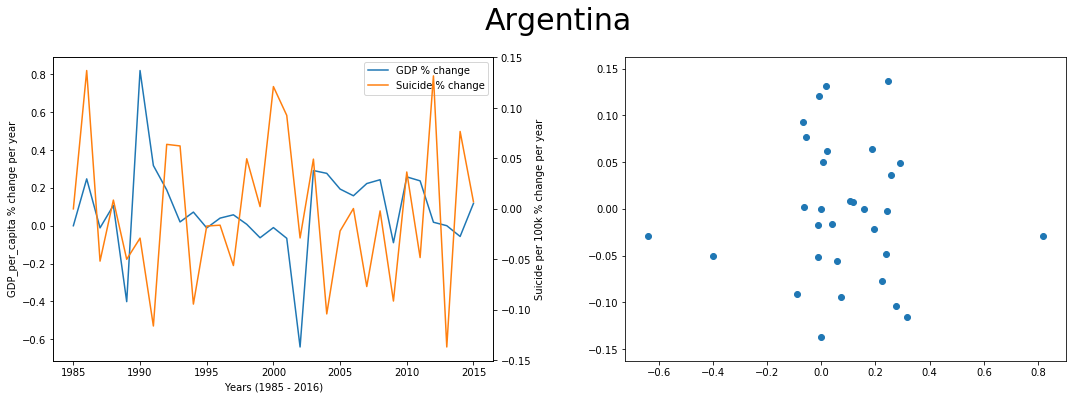

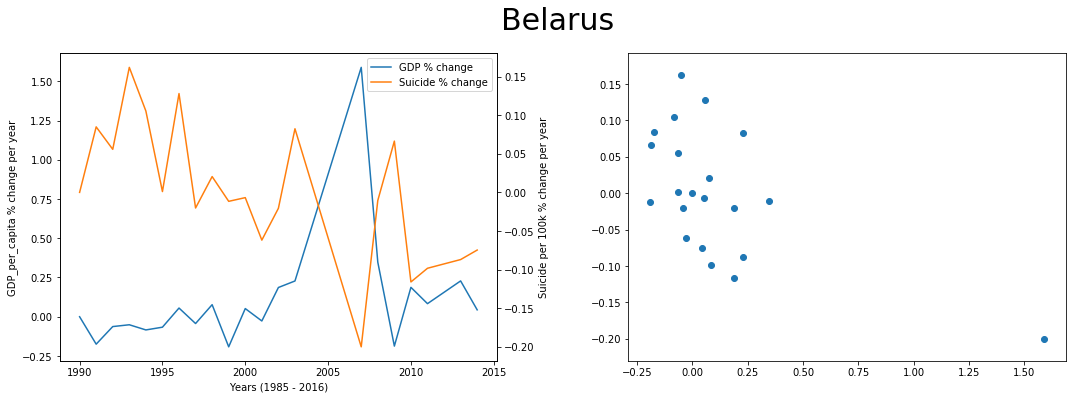

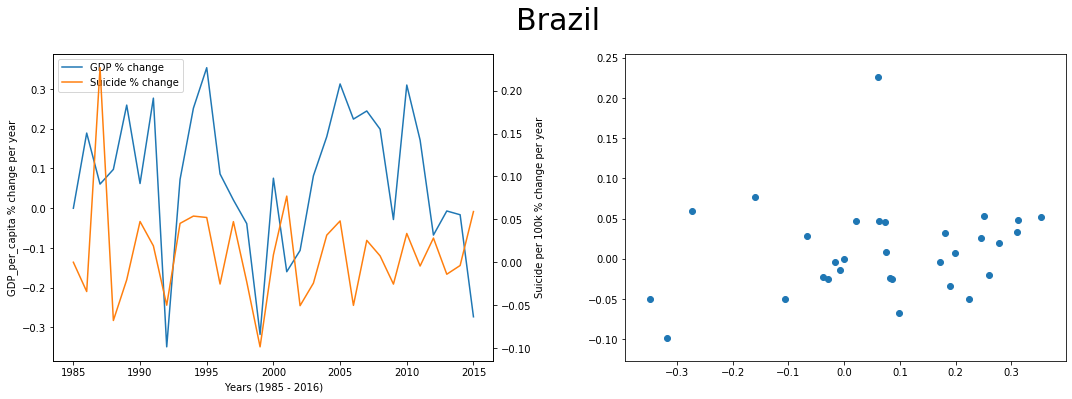

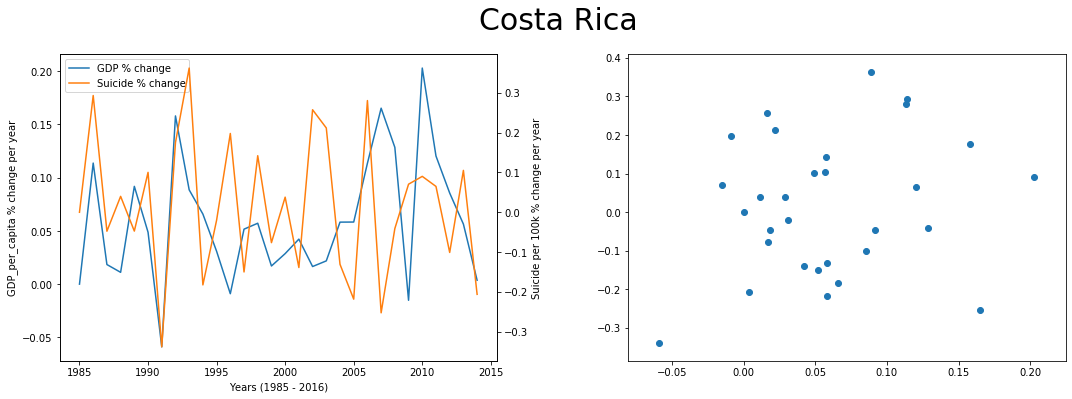

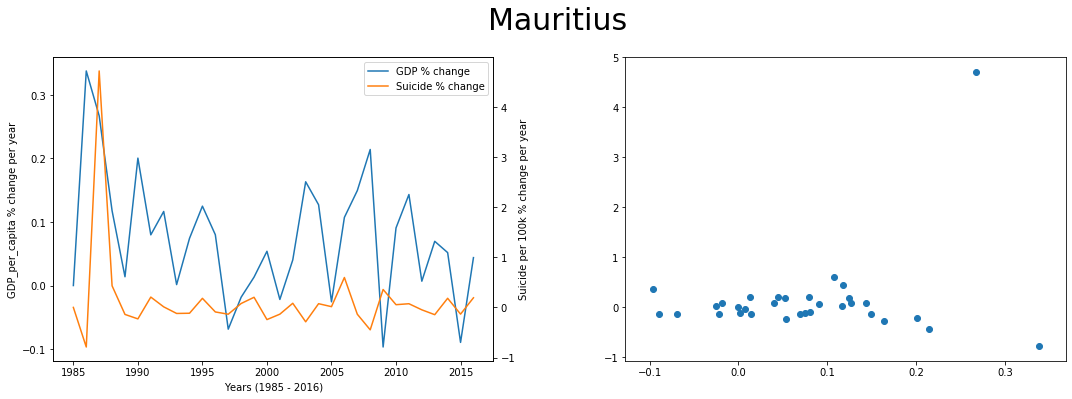

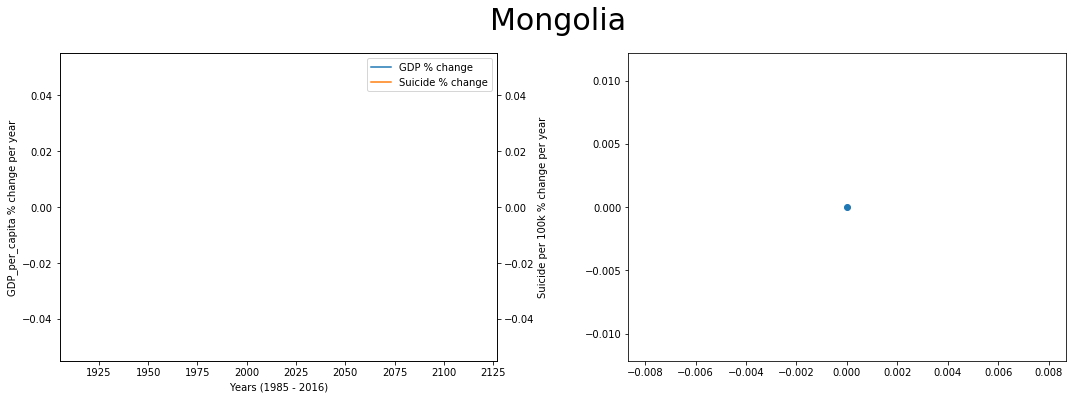

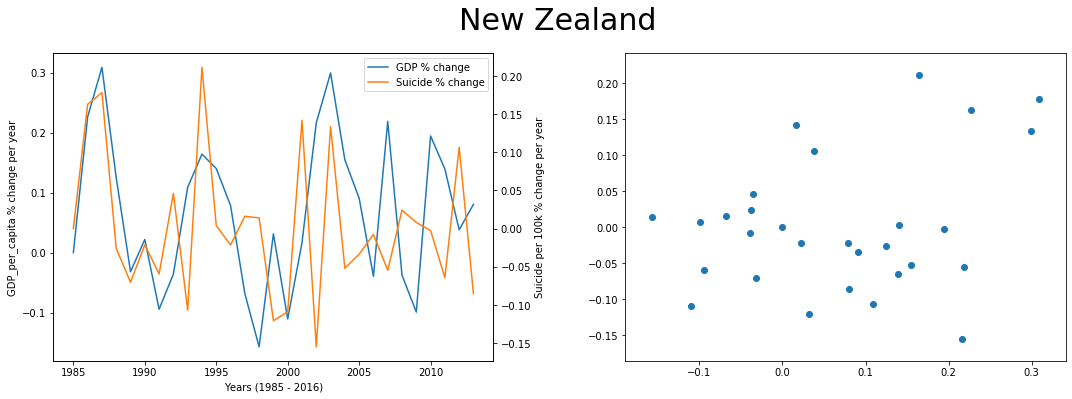

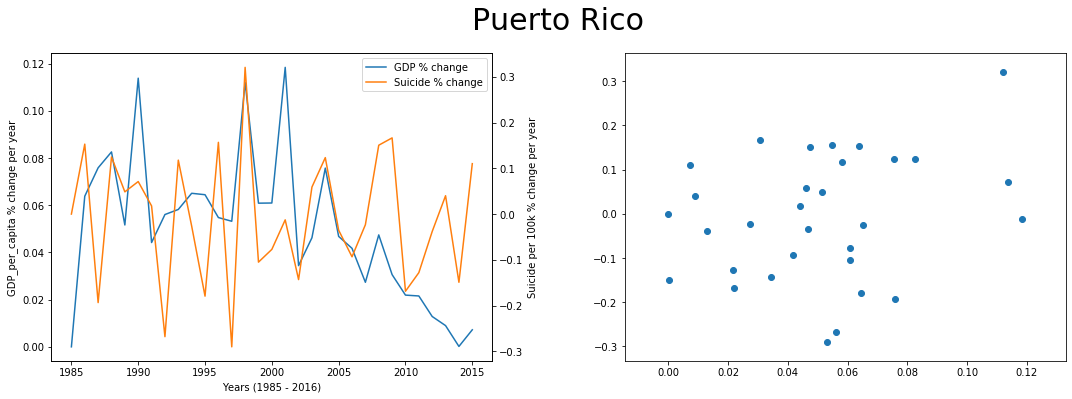

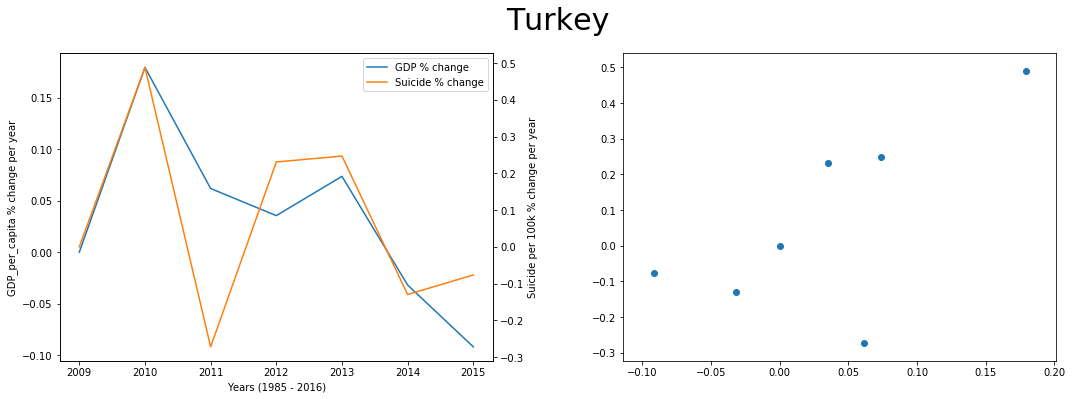

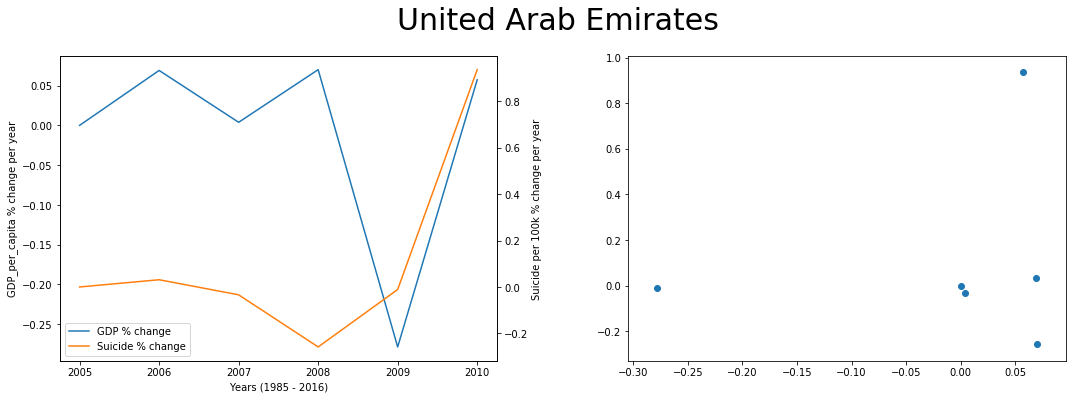

In [19]:
def percent_change(before, after):
    if before != 0:
        return (after - before) / before
    else:
        return 0

def percent_change_across_list(input_list):
    result = []
    for index, value in enumerate(input_list):
        if index == 0:
            result.append(0)
        else:
            result.append(percent_change(input_list[index - 1], value))
    return result

def percent_change_in_gdp_vs_suicide_per_year(country):
    data = rates_85_16[rates_85_16["country"] == country]
    suicide_gdp_per_year = data.groupby(["year"]).mean().reset_index()
    
    gdp_per_year = suicide_gdp_per_year["gdp_per_capita"].tolist()
    gdp_change_per_year = percent_change_across_list(gdp_per_year)
    
    suicides_per_year = suicide_gdp_per_year["suicides_per_100k"].tolist()
    suicides_change_per_year = percent_change_across_list(suicides_per_year)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    color = 'tab:blue'
    ax1.set_xlabel('Years (1985 - 2016)')
    ax1.set_ylabel('GDP_per_capita % change per year')
    line1 = ax1.plot(suicide_gdp_per_year["year"], gdp_change_per_year, color=color, label="GDP % change")
    ax1.legend(loc = 0)
    
    ax3 = ax1.twinx()
    
    color = "tab:orange"
    ax3.set_ylabel('Suicide per 100k % change per year')
    line2 = ax3.plot(suicide_gdp_per_year["year"], suicides_change_per_year, color=color, label="Suicide % change")

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc=0)
    
    ax2.scatter(gdp_change_per_year, suicides_change_per_year)
    
    fig.suptitle(country, x= .52, y = 1.1, fontsize=30)
    fig.tight_layout()
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
            
for country in countries:
    percent_change_in_gdp_vs_suicide_per_year(country)  


# P-value evaluation of GDP vs Suicide Rate

In [20]:
def calculate_p_gdp_sui(country):
    df = rates_85_16[rates_85_16["country"] == country]
    outcome_1, predictors_1 = patsy.dmatrices("suicides_per_100k~gdp_per_capita", df)
    mod_1 = sm.OLS(outcome_1, predictors_1)
    res_1 = mod_1.fit()
    
    print("result for " + country)
    print("\n")
    print(res_1.summary())
    print("\n")
    print("\n")
    
for country in countries:
    calculate_p_gdp_sui(country)

result for Argentina


                            OLS Regression Results                            
Dep. Variable:      suicides_per_100k   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.107
Date:                Sat, 08 Jun 2019   Prob (F-statistic):              0.147
Time:                        17:35:04   Log-Likelihood:                -1444.7
No. Observations:                 372   AIC:                             2893.
Df Residuals:                     370   BIC:                             2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.

                            OLS Regression Results                            
Dep. Variable:      suicides_per_100k   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sat, 08 Jun 2019   Prob (F-statistic):                nan
Time:                        17:35:04   Log-Likelihood:                -40.781
No. Observations:                  10   AIC:                             83.56
Df Residuals:                       9   BIC:                             83.86
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.073e-06   2.77e-07      3.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


# P-value evaluation of HDI vs Suicide Rate

In [21]:
def calculate_p_hdi_sui(country):
    df = rates_85_16[rates_85_16["country"] == country]
    try:
        outcome_1, predictors_1 = patsy.dmatrices("suicides_per_100k~hdi", df)
        mod_1 = sm.OLS(outcome_1, predictors_1)
        res_1 = mod_1.fit()

        print(res_1.summary())
    except:
        print("no enough data")
        pass
    
for country in countries:
    print("result for " + country)
    print("\n")
    calculate_p_hdi_sui(country)
    print("\n")
    print("\n")

result for Argentina


                            OLS Regression Results                            
Dep. Variable:      suicides_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5851
Date:                Sat, 08 Jun 2019   Prob (F-statistic):              0.446
Time:                        17:35:04   Log-Likelihood:                -457.58
No. Observations:                 120   AIC:                             919.2
Df Residuals:                     118   BIC:                             924.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6438     15.

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.






# Average Suicide Rate Across Countries from Kaggle Dataset

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*